**Import the Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("US_violent_crime.csv")

In [4]:
df.head(50)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
df = pd.read_csv("US_violent_crime.csv", index_col=0)

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


**Feature Descriptions**
1. `Murder`:	Murder rate (per 100,000 population). This is the number of murders per 100,000 people in the state.
2. `Assault`:	Assault rate (per 100,000 population). This represents the number of reported assaults per 100,000 people.
3. `UrbanPop`:	Urban population percentage. This shows the percentage of the population living in urban areas for each state.
4. `Rape`:	Rape rate (per 100,000 population). Number of reported rape incidents per 100,000 people.


# **EDA**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


There are no missing values in the dataset

In [11]:
#Basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


**Hopkins Test**

In [21]:
!pip install pyclustertend

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 1.3 MB/s eta 0:00:07
   ---------------------------------------- 0.1/8.1 MB 656.4 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 656.4 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 656.4 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 302.7 kB/s eta 0:00:27
   ---------------------------------------- 0.1/8.1 MB 302.7 kB/s eta 0:00:27
   ---------------------------------------- 0.1/8.1 MB 302.7 kB/s eta 0:00:27
   ---------------------------------------- 0.1/8.1 MB 249.8 kB/s eta 0:00:32
    --------------------------------------- 0.1/8.1 MB 284.4 kB/s eta 0:00:28
    --------------------------------------- 0.1/8.1 MB 266.9 kB/s eta 0:00:30
    --------------------------------------- 0.1/8.1 MB 266.9 kB/s eta 0:00:30
    --

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [25]:
# import necessary libs
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [27]:
hopkins(scale(df), df.shape[0])

0.37182058381510674

*Interpretation of the Hopkins Statistic*
- There aren’t strong, natural "clumps" or groupings of states based on the four crime variables (Murder, Assault, UrbanPop, Rape)
- We are still going to apply the K-Means clustering algorithm for learning purposes, even though the clusters might be forced and not very meaningful

# **K-Means Modelling**

In [35]:
from sklearn.cluster import KMeans

In [51]:
k_means_model = KMeans(n_clusters=2, random_state=42)
# We are asking K-Means to split the 50 U.S. states into 2 clusters (n_clusters=2)
# By setting a seed value (random_state=42), the initial placement of cluster centroids will be the same every time you run the code, allowing for consistent and reproducible clustering results.

In [53]:
k_means_model.fit(df)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [55]:
clusters = k_means_model.labels_

In [57]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

*Interpretation*
- The above gives us the cluster label assigned to each data point (in our case, each U.S. state), after fitting K-Means.
- Alabama, Alaska, Arizona, Arkansas, California all belong to the same cluster; cluster 1.


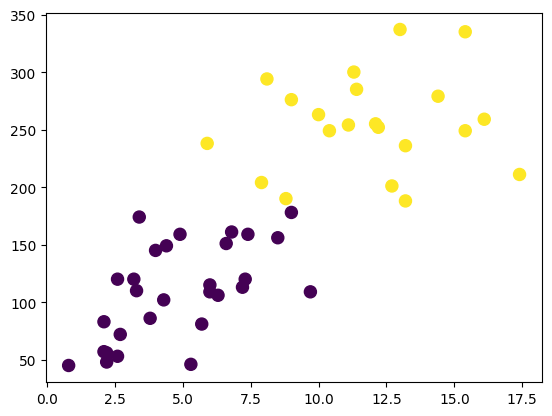

In [66]:
# Visualize the results with the aid of a scatter plot
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 75, cmap = "viridis")

- `df.iloc[:, 0]` → put murder on the x-axis

- `df.iloc[:, 1]` → put assault on the y-axis

- Cluster 0 (purple) seems to group states with lower murder and assault rates
- Cluster 1 (yellow) likely represents higher crime rate states

In [77]:
# Let's add the centroids to the plot
centroids = k_means_model.cluster_centers_ 

In [79]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

- For X-axis: [  4.84137931, 109.75862069,  64.03448276,  16.24827586]
- For Y-axis: [ 11.85714286, 255.        ,  67.61904762,  28.11428571]

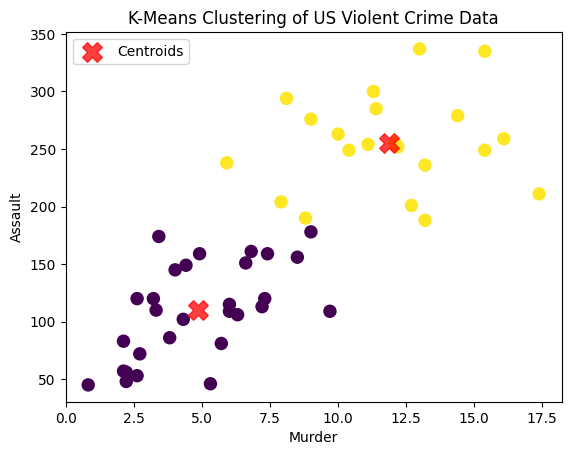

In [87]:
# Plot data points with cluster color
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=75, cmap='viridis')
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids', alpha=0.75)
plt.xlabel("Murder")
plt.ylabel("Assault")
plt.title("K-Means Clustering of US Violent Crime Data")
plt.legend()
plt.show()